Build an enhanced report on a stock ticker

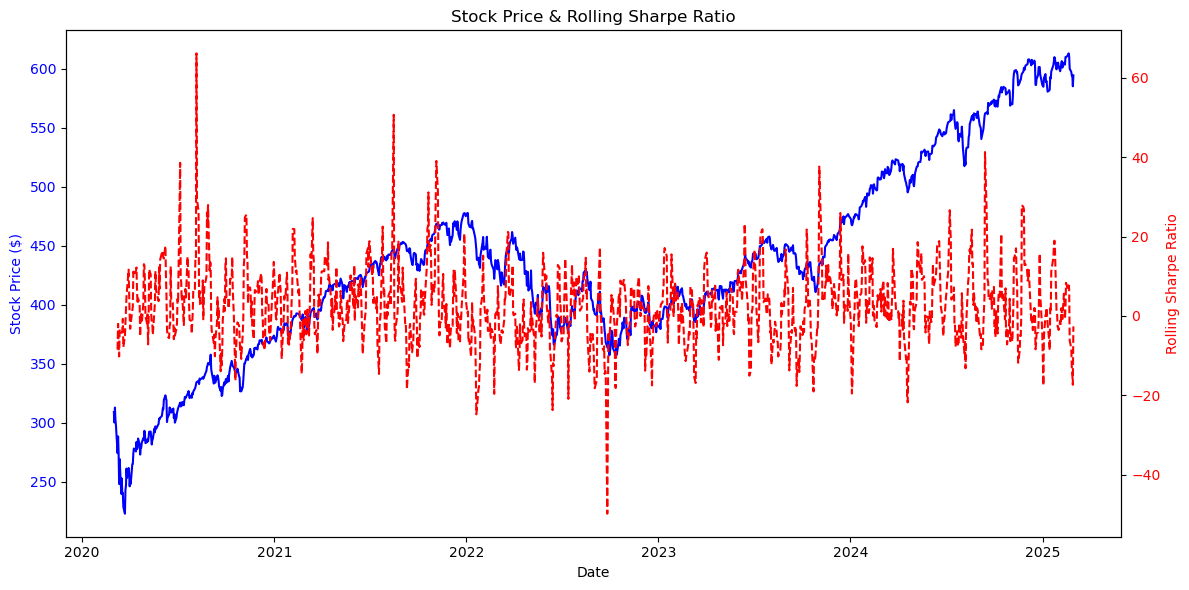

       Sharpe Ratio  Annualized Return  Annualized Volatility
Value      0.686156           0.165232               0.208359


In [1]:
#Visualize Results
# Recreate the sample dataset based on the provided CSV rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "F:/inputs/stocks/SPY.csv"  # Fixed path using forward slashes

# Read the sample data into a Pandas DataFrame
df = pd.read_csv(file_path, parse_dates=['Date'])

# Preprocess the dataset (remove dollar signs and convert to float)
cols_to_clean = ["Close/Last", "Open", "High", "Low"]
for col in cols_to_clean:
    df[col] = df[col].replace({r'\$': ''}, regex=True).astype(float)  # Added 'r' prefix for raw string

# Sort by date
df = df.sort_values(by="Date")

# Compute daily returns
df['Daily Return'] = df['Close/Last'].pct_change()

# Define risk-free rate (e.g., 1% annualized -> daily rate)
risk_free_rate = 0.01
risk_free_daily = risk_free_rate / 252

# Calculate excess returns
df['Excess Return'] = df['Daily Return'] - risk_free_daily

# Compute Sharpe Ratio components
mean_excess = df['Excess Return'].mean()
std_excess = df['Excess Return'].std()

# Compute annualized Sharpe Ratio
sharpe_ratio = (mean_excess / std_excess) * np.sqrt(252)

# Compute additional metrics
annualized_return = (1 + df['Daily Return'].mean())**252 - 1
annualized_volatility = df['Daily Return'].std() * np.sqrt(252)

# Display the results
stock_metrics = {
    'Sharpe Ratio': sharpe_ratio,
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility
}

# Plot Stock Price and Rolling Sharpe Ratio
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stock price trend
ax1.plot(df['Date'], df['Close/Last'], label="Stock Price", color='blue')
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price ($)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rolling Sharpe Ratio
ax2 = ax1.twinx()
rolling_sharpe = df['Excess Return'].rolling(window=5).mean() / df['Excess Return'].rolling(window=5).std()
rolling_sharpe = rolling_sharpe * np.sqrt(252)  # Annualized
ax2.plot(df['Date'], rolling_sharpe, label="Rolling Sharpe (5-day)", color='red', linestyle='dashed')
ax2.set_ylabel("Rolling Sharpe Ratio", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and Legends
plt.title("Stock Price & Rolling Sharpe Ratio")
fig.tight_layout()
plt.show()

# Display stock metrics
# Convert metrics dictionary to DataFrame for better display
metrics_df = pd.DataFrame(stock_metrics, index=["Value"])
print(metrics_df)  # Fixed variable name (was metric_df, now metrics_df)